In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, mutual_info_regression, SelectFromModel, VarianceThreshold
from methods import pre


## AJIVE

In [2]:
gdsc_ge = pd.read_csv('data/Processed/gdsc_cell_ge.csv').fillna(0).set_index('CCL')
ctrp_ge = pd.read_csv('data/Processed/ctrp_cell_ge.csv').fillna(0).set_index('CCL')
ccle_ge = pd.read_csv('data/Processed/ccle_cell_ge.csv').fillna(0).set_index('CCL')
gdsc_dr = pd.read_csv('data/Processed/gdsc_poz_dr.csv').fillna(0)
ctrp_dr = pd.read_csv('data/Processed/ctrp_poz_dr.csv').fillna(0)

In [3]:
for i in ctrp_dr['Drug_name'].unique():
    if i in gdsc_dr['Drug_name'].unique():
        print(i)

Afatinib
Axitinib
AZD6482
AZD7762
AZD8055
Bexarotene
BI-2536
BIRB-796
Bleomycin
BMS-536924
BMS-754807
Bortezomib
Bosutinib
CHIR-99021
Crizotinib
Cytarabine
Dasatinib
Docetaxel
Doxorubicin
Entinostat
Erlotinib
Etoposide
GDC-0941
Gefitinib
Gemcitabine
GW-843682X
Imatinib
KU-55933
Lapatinib
Linsitinib
Methotrexate
MG-132
Mitomycin
MK-2206
Navitoclax
Nilotinib
Nutlin-3
NVP-BEZ235
TAE684
Obatoclax
Olaparib
PAC-1
Paclitaxel
Parthenolide
Pazopanib
PLX-4720
QS-11
Saracatinib
Selumetinib
Serdemetan
Rapamycin
Sorafenib
Sunitinib
17-AAG
Temsirolimus
TGX-221
Tipifarnib
TW-37
Veliparib
Vorinostat
VX-680


In [4]:
from classes import drug
aag = drug('Bexarotene', {'ctrp': ctrp_ge, 'gdsc': gdsc_ge}, {'ctrp': ctrp_dr, 'gdsc': gdsc_dr})

In [5]:
aag.data.empty

True

In [6]:
aag.pre(p=0.1)

In [7]:
s = []
for i in ctrp_ge.columns:
    if i not in gdsc_ge.columns:
        s.append(i)
print(len(s))

2751


In [8]:
ctrp_ge.shape

(449, 19851)

In [9]:
aag.combine()
aag.split()

In [10]:
aag.fs(f_regression, n=0.01)

After fs (272, 187) (813, 187)


In [11]:
ctrp = aag.get('X', 'train').loc['ctrp'][:100]
gdsc = aag.get('X', 'train').loc['gdsc'][:100]

In [16]:
from methods import pre
a = pre(pd.concat(blocks, sort=False))

In [13]:
blocks = {'gdsc':gdsc,'ctrp': ctrp}

In [17]:
a.loc['gdsc'][:100].values

array([[10.01353468,  3.19683885,  0.        , ...,  3.53407406,
         5.09453703,  6.97014842],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 9.94385761,  3.32523205,  0.        , ...,  3.55083966,
         4.55715154,  6.95194815],
       ...,
       [ 9.78323616,  3.29488962,  0.        , ...,  3.98153379,
         4.05573804,  7.13732788],
       [10.12771864,  4.0801058 ,  0.        , ...,  3.2974372 ,
         5.52742525,  7.30495645],
       [ 8.37477319,  3.42863026,  0.        , ...,  3.35763683,
         6.16391807,  8.10124723]])

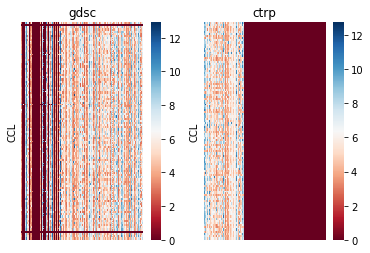

In [19]:
from jive.viz.block_visualization import data_block_heatmaps, jive_full_estimate_heatmaps
from jive.PCA import PCA

data_block_heatmaps(blocks)

In [20]:
PCA().fit(ctrp)

Rank 100 PCA of a (100, 187) matrix

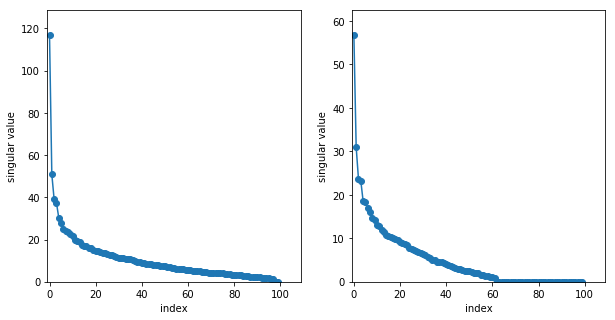

In [21]:
from jive.PCA import PCA
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
PCA().fit(gdsc).plot_scree()
plt.subplot(1, 2, 2)
PCA().fit(ctrp).plot_scree()

In [23]:
chosen = []
last = 0
for i in PCA().fit(gdsc).svals_:
    if abs(last-i) < 0.01*i:
        chosen.append(i)
    last = i
print(len(chosen))

9


In [24]:
chosen = []
last = 0
for i in PCA().fit(ctrp).svals_:
    if abs(last-i) < 0.01*i:
        chosen.append(i)
    last = i
print(len(chosen))

38


In [49]:
from jive.AJIVE import AJIVE
lo = AJIVE({'gdsc':9, 'ctrp':38}, joint_rank=1)

In [43]:
from methods import pre
a = pre(pd.concat(blocks, sort=False))

In [50]:
lo.fit(blocks = {'gdsc':gdsc,'ctrp': ctrp})

AJIVE, joint rank: 1, block gdsc indiv rank: 8, block ctrp indiv rank: 37

In [51]:
gdsc.shape

(100, 187)

In [52]:
lo.blocks['gdsc'].joint

Rank 1 PCA of a (100, 187) matrix

In [53]:
lo.results_dict()['gdsc']['joint']['full']

,ACAT1,AMOTL2,ANXA2P2,BTBD3,DLGAP1-AS1,DLGAP1-AS2,ELOVL7,EML3,ESD,F2RL1,...,SNORA18,SNORA40,SRPRA,TATDN1P1,TAX1BP3,TMED7,TMEM35B,TNS2,WHAMMP3,ZPR1
HT1376,0.979825,0.125346,0.0,1.634413,0.0,0.0,0.761198,0.447075,0.926291,-0.599749,...,1.049163,0.488770,0.571449,0.639927,-0.107255,0.203467,0.158825,0.182004,0.204164,0.449595
JHH2,-0.649648,-0.083108,0.0,-1.083655,0.0,0.0,-0.504693,-0.296421,-0.614154,0.397648,...,-0.695621,-0.324066,-0.378885,-0.424287,0.071113,-0.134904,-0.105305,-0.120673,-0.135366,-0.298092
HT144,0.418464,0.053533,0.0,0.698025,0.0,0.0,0.325093,0.190937,0.395601,-0.256141,...,0.448077,0.208744,0.244055,0.273300,-0.045807,0.086897,0.067831,0.077730,0.087194,0.192013
NCIH1581,0.924971,0.118329,0.0,1.542913,0.0,0.0,0.718584,0.422046,0.874434,-0.566173,...,0.990428,0.461407,0.539458,0.604102,-0.101251,0.192077,0.149933,0.171815,0.192734,0.424425
NCIH2452,0.508472,0.065048,0.0,0.848165,0.0,0.0,0.395018,0.232006,0.480691,-0.311235,...,0.544455,0.253643,0.296549,0.332085,-0.055659,0.105588,0.082421,0.094450,0.105949,0.233314
ASPC1,0.161325,0.020638,0.0,0.269101,0.0,0.0,0.125329,0.073609,0.152511,-0.098747,...,0.172741,0.080474,0.094087,0.105362,-0.017659,0.033500,0.026150,0.029966,0.033615,0.074024
KELLY,0.146596,0.018754,0.0,0.244531,0.0,0.0,0.113886,0.066889,0.138586,-0.089731,...,0.156970,0.073127,0.085497,0.095742,-0.016047,0.030442,0.023762,0.027230,0.030546,0.067266
KARPAS299,-0.255978,-0.032747,0.0,-0.426988,0.0,0.0,-0.198862,-0.116798,-0.241992,0.156684,...,-0.274093,-0.127690,-0.149290,-0.167180,0.028020,-0.053156,-0.041493,-0.047548,-0.053338,-0.117456
PATU8902,-0.094437,-0.012081,0.0,-0.157527,0.0,0.0,-0.073365,-0.043090,-0.089277,0.057805,...,-0.101120,-0.047108,-0.055077,-0.061677,0.010337,-0.019610,-0.015308,-0.017542,-0.019678,-0.043333
ZR751,-0.148617,-0.019012,0.0,-0.247904,0.0,0.0,-0.115457,-0.067811,-0.140498,0.090968,...,-0.159135,-0.074135,-0.086676,-0.097063,0.016268,-0.030861,-0.024090,-0.027606,-0.030967,-0.068193


In [77]:
blocks['ctrp']

,ACAT1,AMOTL2,ANXA2P2,BTBD3,DLGAP1-AS1,DLGAP1-AS2,ELOVL7,EML3,ESD,F2RL1,...,SNORA18,SNORA40,SRPRA,TATDN1P1,TAX1BP3,TMED7,TMEM35B,TNS2,WHAMMP3,ZPR1
CCL,,,,,,,,,,,,,,,,,,,,,
HT1376,5.935372,10.429749,11.858762,8.038915,6.800414,5.902641,8.534971,6.408530,6.839913,9.285774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JHH2,5.199175,8.427576,12.008772,8.073659,5.099386,4.263182,4.605642,5.986680,6.909981,10.441446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HT144,5.679712,9.346883,12.319438,9.074728,5.875561,5.314404,5.651561,6.222788,7.855315,4.829099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCIH1581,5.999331,8.819496,10.008641,8.414141,7.028770,6.914510,3.232832,6.428289,7.438477,4.481001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCIH2452,5.821314,10.129348,12.458539,7.981355,6.244988,6.274810,6.669874,6.396638,7.337183,4.734275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ASPC1,5.587124,9.362770,12.205893,7.805570,6.839434,6.781528,6.388305,6.279477,7.076107,10.100379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KELLY,6.013519,5.067056,7.005682,8.725168,4.103845,3.693028,3.281735,5.775181,8.031965,3.692116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KARPAS299,5.805685,3.853187,10.611352,3.368534,6.582587,6.590705,7.572141,6.135254,7.798272,3.965040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PATU8902,6.395385,8.786583,11.943921,7.191412,6.138975,7.010184,8.930805,6.106445,8.033929,9.325934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
lo.results_dict()['ctrp']['joint']['full']

,ACAT1,AMOTL2,ANXA2P2,BTBD3,DLGAP1-AS1,DLGAP1-AS2,ELOVL7,EML3,ESD,F2RL1,...,SNORA18,SNORA40,SRPRA,TATDN1P1,TAX1BP3,TMED7,TMEM35B,TNS2,WHAMMP3,ZPR1
HT1376,0.004053,1.036455,0.531990,0.973975,0.292520,0.078118,0.006566,0.038603,0.009554,-0.641325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JHH2,-0.002687,-0.687195,-0.352723,-0.645769,-0.193948,-0.051794,-0.004354,-0.025595,-0.006335,0.425214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HT144,0.001731,0.442649,0.227202,0.415965,0.124929,0.033363,0.002804,0.016486,0.004080,-0.273897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCIH1581,0.003826,0.978431,0.502208,0.919448,0.276143,0.073745,0.006199,0.036442,0.009019,-0.605422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCIH2452,0.002103,0.537860,0.276072,0.505436,0.151801,0.040539,0.003408,0.020033,0.004958,-0.332811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ASPC1,0.000667,0.170649,0.087591,0.160362,0.048162,0.012862,0.001081,0.006356,0.001573,-0.105592,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KELLY,0.000606,0.155068,0.079593,0.145720,0.043765,0.011688,0.000982,0.005776,0.001429,-0.095951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KARPAS299,-0.001059,-0.270773,-0.138982,-0.254450,-0.076420,-0.020408,-0.001715,-0.010085,-0.002496,0.167545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PATU8902,-0.000391,-0.099895,-0.051274,-0.093873,-0.028193,-0.007529,-0.000633,-0.003721,-0.000921,0.061812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZR751,-0.000615,-0.157207,-0.080691,-0.147730,-0.044369,-0.011849,-0.000996,-0.005855,-0.001449,0.097275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
lo.results_dict()['gdsc']['joint']['scores']

,joint_comp_0
HT1376,-0.284513
JHH2,0.188639
HT144,-0.121510
NCIH1581,-0.268585
NCIH2452,-0.147646
ASPC1,-0.046844
KELLY,-0.042567
KARPAS299,0.074329
PATU8902,0.027422
ZR751,0.043154


In [94]:
lo.results_dict()['gdsc']['joint']['scores'][:2]

,joint_comp_0
HT1376,-0.284513
JHH2,0.188639


In [93]:
gdsc.loc[['HT1376', 'JHH2']]

/rwthfs/rz/cluster/home/kz035322/Thesis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,ACAT1,AMOTL2,ANXA2P2,BTBD3,DLGAP1-AS1,DLGAP1-AS2,ELOVL7,EML3,ESD,F2RL1,...,SNORA18,SNORA40,SRPRA,TATDN1P1,TAX1BP3,TMED7,TMEM35B,TNS2,WHAMMP3,ZPR1
CCL,,,,,,,,,,,,,,,,,,,,,
HT1376,9.218517,4.447032,0.0,4.883433,0.0,0.0,5.674231,8.210178,9.259082,5.925713,...,7.99411,3.930427,5.778468,7.919051,10.563326,8.476835,7.869735,3.150081,4.865354,6.521828
JHH2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
lo.blocks['gdsc'].joint.predict_scores(gdsc.loc[['HT1376', 'JHH2']])

/rwthfs/rz/cluster/home/kz035322/Thesis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


array([[2.23587097],
       [       nan]])

In [ ]:
lo.blocks['ctrp'].individual.plot_scores()

In [ ]:
from jive.viz.block_visualization import data_block_heatmaps, jive_full_estimate_heatmaps
jive_full_estimate_heatmaps(lo.get_full_block_estimates(),
                            blocks={'gdsc':gdsc.T,'ctrp': ctrp.T})

In [ ]:
lo.plot_joint_diagnostic()

## Implementing New DA's and Standardization/Normalization

In [4]:
gdsc_ge = pd.read_csv('data/Processed/gdsc_cell_ge.csv').fillna(0).set_index('CCL')

In [9]:
import OnPLS
import numpy as np

In [11]:
np.random.seed(42)

n, p_1, p_2, p_3 = 4, 3, 4, 5
t = np.sort(np.random.randn(n, 1), axis=0)
p1 = np.sort(np.random.randn(p_1, 1), axis=0)
p2 = np.sort(np.random.randn(p_2, 1), axis=0)
p3 = np.sort(np.random.randn(p_3, 1), axis=0)
X1 = np.dot(t, p1.T) + 0.1 * np.random.randn(n, p_1)
X2 = np.dot(t, p2.T) + 0.1 * np.random.randn(n, p_2)
X3 = np.dot(t, p3.T) + 0.1 * np.random.randn(n, p_3)

In [12]:
# Define the connections between blocks
predComp = [[0, 1, 1], [1, 0, 1], [1, 1, 0]]
# Define the numbers of non-global components
orthComp = [1, 1, 1]

# Create the estimator
onpls = OnPLS.estimators.OnPLS(predComp, orthComp)

In [13]:
# Fit a model
onpls.fit([X1, X2, X3])

# Perform prediction of all matrices from all connected matrices
Xhat = onpls.predict([X1, X2, X3])

# Compute prediction score
score = onpls.score([X1, X2, X3])

cv_scores = OnPLS.resampling.cross_validation(onpls, [X1, X2, X3], cv_rounds=4)

/Users/admin/Desktop/Thesis/Code/OnPLS/OnPLS/estimators.py:132: UserWarning: Too small orthogonal component for matrix 2! Not included!
  warnings.warn(warning)
/Users/admin/Desktop/Thesis/Code/OnPLS/OnPLS/estimators.py:132: UserWarning: Too small orthogonal component for matrix 0! Not included!
  warnings.warn(warning)


In [17]:
onpls.precomputedW

[array([[-0.15363395],
        [-0.18393189],
        [ 0.97085821]]),
 array([[-0.38025657],
        [-0.45758902],
        [ 0.47166374],
        [ 0.65080762]]),
 array([[ 0.69783882],
        [ 0.64528545],
        [ 0.22216816],
        [ 0.20472423],
        [-0.07319133]])]

## Checking ElasticNet RandomizedSearch

In [9]:
gdsc_ge = pd.read_csv('data/Processed/gdsc_cell_ge.csv').fillna(0).set_index('CCL')
gdsc_dr = pd.read_csv('data/Processed/gdsc_poz_dr.csv').fillna(0)

In [ ]:
gdsc

In [11]:
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV
iris = load_iris()
t3 = {
    'alpha': [0.5, 1, 1.5, 2, 5],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
    'max_iter': [5000]
}

lo = RandomizedSearchCV(linear_model.ElasticNet(), t3, n_iter=50, scoring='r2')
lo.fit(iris.data, iris.target)
pe = pd.DataFrame(lo.cv_results_)

/Users/admin/Desktop/Thesis/Code/phc-data-pipeline/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/admin/Desktop/Thesis/Code/phc-data-pipeline/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 25 is smaller than n_iter=50. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/admin/Desktop/Thesis/Code/phc-data-pipeline/venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/admin/Desktop/Thesis/Code/phc-data-pip

## Reducing memory usage by using indices

In [1]:
from classes import drug
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, mutual_info_regression, SelectFromModel, VarianceThreshold

In [8]:
%%time
gdsc_ge = pd.read_csv('data/Processed/gdsc_cell_ge.csv').fillna(0).set_index('CCL')
ctrp_ge = pd.read_csv('data/Processed/ctrp_cell_ge.csv').fillna(0).set_index('CCL')
gdsc_dr = pd.read_csv('data/Processed/gdsc_poz_dr.csv').fillna(0)
ctrp_dr = pd.read_csv('data/Processed/ctrp_poz_dr.csv').fillna(0)

CPU times: user 35.9 s, sys: 579 ms, total: 36.5 s
Wall time: 36.4 s


In [9]:
%%time
aag = drug('17-AAG', {'ctrp': ctrp_ge, 'gdsc': gdsc_ge}, {'ctrp': ctrp_dr, 'gdsc': gdsc_dr})

CPU times: user 1.44 s, sys: 4.97 ms, total: 1.45 s
Wall time: 1.45 s


In [10]:
aag.pre()

In [11]:
'ge' in aag.__dict__

False

In [12]:
aag.combine()

In [13]:
aag.split()

In [14]:
aag.get('X', 'train').shape

(827, 20600)

'mean is 1, std is 2'

In [15]:

aag.fs(mutual_info_regression, n=0.01)

206 features
[[ 8.22625117  7.9240769  11.25370085 ...  0.          0.
   0.        ]
 [ 7.38502456  9.18294846 11.28107417 ...  0.          0.
   0.        ]
 [ 6.48340108 10.20096264  9.33630783 ...  6.24645304  3.41559208
   3.64098972]
 ...
 [ 6.48211485  9.75738726 10.56100587 ...  8.97084604  3.28393378
   3.57814007]
 [ 5.82768649  9.15923494 10.25319984 ...  3.9957859   3.14716415
   3.25962857]
 [ 5.93190027 10.3220042   9.9263591  ...  3.53349924  3.26787564
   3.32453528]]
After fs (276, 206) (827, 206)


In [16]:
aag.get('X', 'train')

AGGF1     ANAPC5      AP3S1  ARHGAP27      ASPH  \
     CCL                                                               
ctrp LN229        8.226251   7.924077  11.253701  4.407883  7.413361   
     KCL22        7.385025   9.182948  11.281074  4.634485  7.294799   
gdsc HUPT4        6.483401  10.200963   9.336308  4.412368  5.471657   
     SIMA         5.733640   9.590814   9.940340  3.210771  3.790866   
     RPMI6666     5.988554   9.614634  10.509346  3.716671  3.724674   
ctrp NCIH520      7.554070   8.654919  11.247098  4.837946  6.880808   
     SIGM5        7.505783   9.508165  11.261540  5.623851  5.387787   
gdsc HUPT3        5.927602   9.884768  10.187934  4.142101  6.135774   
     CAL27        6.039181   9.712396  10.369503  3.897784  5.095961   
     CCFSTTG1     6.448939   9.764155  10.411066  3.218237  6.006615   
     EW22         5.895883  10.643214   9.926383  3.195529  5.039069   
     SKCO1        5.463876  10.255246   9.851045  3.814860  4.381802   
     MDAMB175VII  0.000000   0.000000   0.000000  0.000000  0.000000   
     P30OHK       5.364537  10.435565   9.801633  3.915209  3.447255   
ctrp RT4          7.897703   8.599565  10.855744  5.897786  7.753499   
     ONS76        8.147711   8.259714  11.217261  5.221980  8.062563   
     SW620        7.850675   9.011963  10.868859  5.557184  6.687329   
gdsc IGR1         6.658858  10.528090  10.316008  3.272897  5.335654   
     IGROV1       6.697842   9.965031  10.006696  3.411352  6.185626   
     ES8          6.461207  10.117543  10.254876  3.219853  4.947870   
ctrp F36P         7.438694   8.634550  11.039533  5.368833  4.334154   
     NCIH1650     7.599365   8.287609  12.366556  5.945763  7.515549   
gdsc NB12         6.585710  10.327555  10.267102  3.529444  5.119063   
     BB30HNC      5.799909   9.224848  10.453288  3.874174  5.441556   
     HUO3N1       5.925074   9.519333  11.009407  3.256450  6.294116   
ctrp COLO741      7.026833   8.961632  10.636383  4.552852  7.510570   
     SKMEL2       8.217357   8.605953  11.404520  4.469186  7.166078   
gdsc HTCC3        6.498834   9.806854  11.206146  3.762811  6.461002   
     AN3CA        6.624060   9.405499  10.219484  3.350144  4.092806   
     LP1          6.981362  10.955981  10.172774  3.549104  4.194012   
...                    ...        ...        ...       ...       ...   
     MFM223       5.978314  10.293755  11.295266  3.410034  4.908951   
     MOLT13       6.376185  10.812686   9.864369  4.230752  3.440337   
     KPNYN        6.525957  10.068755  10.087117  3.271254  4.801131   
     MS1          6.347218  10.495746  10.329120  3.240270  5.266675   
     HCE4         5.430459  10.337140  10.314745  3.598583  6.444456   
ctrp NCIH1869     7.648851   8.449174  10.781205  6.212209  7.517211   
gdsc NB13         6.053712  10.418273   9.917771  3.348992  4.398073   
ctrp LUDLU1       7.374022   8.684836   9.893045  5.334680  8.949058   
gdsc NUGC3        6.126874   9.869306  10.749324  3.926528  6.163007   
     TE5          6.031117   9.813512   7.848015  3.649673  6.121299   
     NCIH1299     5.800552  10.243015  10.988247  3.283758  6.061740   
     CORL105      6.349229  10.107954  10.606656  3.924633  6.954548   
     KYSE410      6.055115   9.977581  11.190523  4.089786  5.689443   
ctrp NCO2         7.829085   9.262973  10.667110  4.898659  5.772034   
gdsc HCC2218      6.477189   9.898588  10.659346  3.796160  6.066949   
     M059J        6.107141  10.060586  10.135172  3.467093  6.314178   
     RO82W1       5.095851   8.750627  10.510959  3.348463  5.842496   
ctrp NCIH2023     7.549882   8.204348  11.295674  5.258304  9.207953   
     KELLY        7.578068   8.662706  10.610751  4.494999  5.721441   
     KYSE450      7.406108   7.719116  10.296452  5.273454  6.015836   
gdsc SCC4         5.774562   9.924332   9.760245  3.764743  6.536751   
     EFO21        6.389112  10.014738   9.485791  3.729927  4.504735   
     CP66MEL      6.316137   9.634863  10.003982  3.172188  5

In [10]:
aag.get('X', 'train').shape

(827, 2060)

In [2]:
from methods import pre
lo = 34


AttributeError: 'int' object has no attribute '__name__'

In [ ]:
aag.X['fs_test']

## Speeding up combine

In [12]:
gdsc_dr = pd.read_csv('data/Processed/gdsc_poz_dr.csv').fillna(0)
gdsc_ge = pd.read_csv('data/Processed/gdsc_cell_ge.csv').fillna(0).set_index('CCL')

In [13]:
gdsc_ge.shape[1]

19562

In [15]:
dr = gdsc_dr
ge = gdsc_ge

In [35]:
ge.join(dr[dr['Drug_name'] == '17-AAG'][['CCL', 'AUC_IC50']].set_index('CCL'), how='right')

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A3GALT2P,A4GALT,A4GNT,AAAS,AACS,...,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,AUC_IC50
CCL,,,,,,,,,,,,,,,,,,,,,
22RV1,3.537942,6.364651,5.332441,2.923030,2.815383,2.815383,3.241125,3.262633,4.722157,4.942126,...,7.526319,9.274166,3.785757,5.201929,2.742575,4.635015,3.940190,4.658663,8.088672,0.169156
2313287,3.370950,6.284884,3.485675,2.831562,2.913369,2.913369,3.313028,3.096527,4.873621,4.213177,...,6.526713,8.021952,3.520584,4.957371,2.636933,4.350120,4.395806,4.598583,7.951146,0.577314
5637,2.927335,2.892365,3.181651,2.926549,2.677943,2.677943,4.295357,3.205598,5.249042,4.495021,...,7.057572,9.261486,3.492602,4.813163,2.558705,4.580977,4.810975,4.371501,7.974367,0.828724
639V,3.953010,2.858072,2.892599,2.828334,2.729762,2.729762,2.960059,3.121154,4.445200,4.017422,...,6.310088,8.021780,3.919468,5.923131,2.782005,4.969272,5.481422,5.205446,8.118109,0.726141
647V,2.804009,2.944390,3.178071,2.675572,2.949402,2.949402,3.029297,3.024326,4.636786,4.724453,...,8.657911,9.426794,3.657576,6.082990,3.148358,5.182059,5.203430,4.806941,8.530606,0.008665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAPC,3.043994,3.055992,3.532297,2.946112,2.835091,2.835091,3.273226,3.182387,4.474313,4.238488,...,8.619045,10.392332,3.704526,5.128979,3.082707,4.061633,3.664478,4.276836,7.238275,0.502122
YH13,5.167861,3.072842,3.049070,3.098071,3.029716,3.029716,2.990092,3.318574,4.561866,3.581945,...,8.048126,8.235304,3.305898,4.745612,2.577626,5.215836,7.003537,4.203823,7.919283,0.881166
YKG1,4.711624,3.067945,3.306930,3.037960,2.713442,2.713442,3.154398,2.988924,4.586814,3.781220,...,7.978261,9.150385,3.972405,5.166082,2.813449,5.117194,5.085635,4.918170,8.208343,0.803193


In [28]:
dr[dr['Drug_name'] == '17-AAG'][['CCL', 'AUC_IC50']].set_index('CCL')

,AUC_IC50
CCL,
22RV1,0.169156
2313287,0.577314
5637,0.828724
639V,0.726141
647V,0.008665
...,...
YAPC,0.502122
YH13,0.881166
YKG1,0.803193


In [16]:
%%time
drug_dr = dr[dr['Drug_name'] == '17-AAG'][['CCL', 'AUC_IC50']]

CPU times: user 7.94 ms, sys: 1.2 ms, total: 9.14 ms
Wall time: 15.4 ms


In [17]:
%%time
X = np.array([list(ge.loc[i].values) for i in drug_dr[drug_dr['CCL'].isin(ge.index)]['CCL']])

CPU times: user 2.9 s, sys: 258 ms, total: 3.16 s
Wall time: 3.33 s


In [18]:
%%time
X = X.reshape(drug_dr.shape[0], ge.shape[1])

CPU times: user 31 µs, sys: 1 µs, total: 32 µs
Wall time: 35 µs


In [19]:
%%time
data = pd.DataFrame(X).assign(DR = drug_dr['AUC_IC50'])

CPU times: user 48.3 ms, sys: 9.44 ms, total: 57.7 ms
Wall time: 66.9 ms


In [66]:
data

,0,1,2,3,4,5,6,7,8,9,...,19553,19554,19555,19556,19557,19558,19559,19560,19561,DR
0,3.537942,6.364651,5.332441,2.923030,2.815383,2.815383,3.241125,3.262633,4.722157,4.942126,...,7.526319,9.274166,3.785757,5.201929,2.742575,4.635015,3.940190,4.658663,8.088672,0.169156
1,3.370950,6.284884,3.485675,2.831562,2.913369,2.913369,3.313028,3.096527,4.873621,4.213177,...,6.526713,8.021952,3.520584,4.957371,2.636933,4.350120,4.395806,4.598583,7.951146,0.577314
2,2.927335,2.892365,3.181651,2.926549,2.677943,2.677943,4.295357,3.205598,5.249042,4.495021,...,7.057572,9.261486,3.492602,4.813163,2.558705,4.580977,4.810975,4.371501,7.974367,0.828724
3,3.953010,2.858072,2.892599,2.828334,2.729762,2.729762,2.960059,3.121154,4.445200,4.017422,...,6.310088,8.021780,3.919468,5.923131,2.782005,4.969272,5.481422,5.205446,8.118109,0.726141
4,2.804009,2.944390,3.178071,2.675572,2.949402,2.949402,3.029297,3.024326,4.636786,4.724453,...,8.657911,9.426794,3.657576,6.082990,3.148358,5.182059,5.203430,4.806941,8.530606,0.008665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,3.043994,3.055992,3.532297,2.946112,2.835091,2.835091,3.273226,3.182387,4.474313,4.238488,...,8.619045,10.392332,3.704526,5.128979,3.082707,4.061633,3.664478,4.276836,7.238275,0.502122
656,5.167861,3.072842,3.049070,3.098071,3.029716,3.029716,2.990092,3.318574,4.561866,3.581945,...,8.048126,8.235304,3.305898,4.745612,2.577626,5.215836,7.003537,4.203823,7.919283,0.881166
657,4.711624,3.067945,3.306930,3.037960,2.713442,2.713442,3.154398,2.988924,4.586814,3.781220,...,7.978261,9.150385,3.972405,5.166082,2.813449,5.117194,5.085635,4.918170,8.208343,0.803193
658,3.143593,3.779792,5.095163,2.879333,2.749091,2.749091,3.186225,3.359589,4.511721,4.241912,...,8.196766,9.205680,3.515323,5.152341,2.472749,5.046783,6.016707,5.168183,7.063949,0.513477


## Speeding up pre-processing

In [2]:
gdsc_ge = pd.read_csv('data/Processed/gdsc_cell_ge.csv').fillna(0).set_index('CCL')

In [3]:
print(type(gdsc_ge.keys()))

<class 'pandas.core.indexes.base.Index'>


In [5]:
gdsc_ge.shape

(706, 19562)

In [6]:
gdsc_ge.shape[0]

706

In [8]:
%%time
under = (gdsc_ge.to_numpy()>5).T.astype(np.int8)

n = [np.count_nonzero(i) > 0.1*gdsc_ge.shape[0] for i in under]
names = {gdsc_ge.keys()[k]:v for k, v in enumerate(n)}
indices = [k for k,v in names.items() if v]
index = gdsc_ge[indices]

CPU times: user 117 ms, sys: 6.79 ms, total: 124 ms
Wall time: 125 ms


In [9]:
%%time
index2 = pre(gdsc_ge,t=5, p=0.1)

CPU times: user 6.17 s, sys: 127 ms, total: 6.3 s
Wall time: 6.36 s


In [10]:
index.shape

(706, 9919)

In [11]:
index2.shape

(706, 9919)

## Domain Adaptation experiments

In [113]:
X_a = np.random.rand(3, 2) * 3

In [114]:
X_b = np.random.rand(3, 2) * 4

In [115]:
X_c = np.random.rand(3, 2) * 5

In [116]:
def jump(domain, n, data):
    result = []
    for i, ele in enumerate(data):
        result.append(ele)
        for j in range(0, domain):
            result.append(0)
        result.append(ele)
        for j in range(0, n-domain-1):
            result.append(0)
    return result
    

In [117]:
def feda(domains):
    n = len(domains)
    
    samples = 0
    for i in domains:
        samples += i.shape[0]
    
    features = domains[0].shape[1]*(n+1)
    
    new = np.zeros(features)
    for i, data in enumerate(domains):
        for j in data:
            new = np.vstack([new, jump(i, n, j)])
            
    return new[1:]

In [118]:
feda([X_a, X_b, X_c])

array([[2.39552445, 2.39552445, 0.        , 0.        , 0.8923882 ,
        0.8923882 , 0.        , 0.        ],
       [2.09713092, 2.09713092, 0.        , 0.        , 1.99024727,
        1.99024727, 0.        , 0.        ],
       [2.17421497, 2.17421497, 0.        , 0.        , 2.66618415,
        2.66618415, 0.        , 0.        ],
       [3.77029806, 0.        , 3.77029806, 0.        , 0.52768015,
        0.        , 0.52768015, 0.        ],
       [3.03560501, 0.        , 3.03560501, 0.        , 1.3673342 ,
        0.        , 1.3673342 , 0.        ],
       [2.41889914, 0.        , 2.41889914, 0.        , 3.77142649,
        0.        , 3.77142649, 0.        ],
       [0.70066211, 0.        , 0.        , 0.70066211, 3.89969596,
        0.        , 0.        , 3.89969596],
       [1.67451535, 0.        , 0.        , 1.67451535, 0.97901028,
        0.        , 0.        , 0.97901028],
       [0.52645206, 0.        , 0.        , 0.52645206, 1.13973433,
        0.        , 0.      

## Mess

In [18]:
from methods import fs

In [19]:
fs.__doc__

' Returns a subset of {X_train} and {X_test} with features being selected by the method {model}\n    :param int n: it can be the variance thereshold or the number of chosen features \n    :\n    '

In [45]:
from classes import drug
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import config as c
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, mutual_info_regression, SelectFromModel, VarianceThreshold

In [46]:
gdsc_ge = pd.read_csv(c.dir + 'gdsc_cell_ge.csv').fillna(0).set_index('CCL')
ctrp_ge = pd.read_csv(c.dir + 'ctrp_cell_ge.csv').fillna(0).set_index('CCL')
gdsc_dr = pd.read_csv(c.dir + 'gdsc_poz_dr.csv').fillna(0)
ctrp_dr = pd.read_csv(c.dir + 'ctrp_poz_dr.csv').fillna(0)

In [47]:
%%time
aag = drug('17-AAG', {'ctrp': ctrp_ge, 'gdsc': gdsc_ge}, {'ctrp': ctrp_dr, 'gdsc': gdsc_dr})

CPU times: user 973 ms, sys: 119 ms, total: 1.09 s
Wall time: 1.1 s


In [48]:
aag.to_json()

col
<class 'list'>
da
<class 'dict'>
data
<class 'pandas.core.frame.DataFrame'>
dr
<class 'pandas.core.frame.DataFrame'>
ge
<class 'pandas.core.frame.DataFrame'>
name
<class 'str'>
predicted
<class 'list'>


In [49]:
%%time
aag.pre()

CPU times: user 496 ms, sys: 297 ms, total: 794 ms
Wall time: 888 ms


In [50]:
%%time
aag.combine()

CPU times: user 478 ms, sys: 398 ms, total: 876 ms
Wall time: 898 ms


In [51]:
%%time
aag.split()

CPU times: user 141 ms, sys: 109 ms, total: 250 ms
Wall time: 254 ms


In [52]:
%%time
aag.fs(f_regression, n=0.01)

After fs (276, 206) (827, 206)
CPU times: user 364 ms, sys: 185 ms, total: 550 ms
Wall time: 466 ms


In [9]:
%%time
aag.feda()

CPU times: user 938 ms, sys: 702 ms, total: 1.64 s
Wall time: 1.69 s


In [10]:
aag.get('X', 'train')

,0,1,2,3,4,5,6,7,8,9,...,608,609,610,611,612,613,614,615,616,617
0,4.031054,4.031054,0.0,10.708475,10.708475,0.000000,3.620436,3.620436,0.0,5.459297,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,4.070159,4.070159,0.0,10.684955,10.684955,0.000000,3.457989,3.457989,0.0,6.579006,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,4.254251,4.254251,0.0,10.563919,10.563919,0.000000,3.448932,3.448932,0.0,4.778966,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3,4.292504,4.292504,0.0,6.804169,6.804169,0.000000,3.800755,3.800755,0.0,4.509346,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,4.086229,4.086229,0.0,12.579925,12.579925,0.000000,3.383222,3.383222,0.0,5.262325,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
823,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
824,0.000000,0.000000,0.0,9.771689,0.000000,9.771689,0.000000,0.000000,0.0,0.000000,...,5.976329,3.557185,0.0,3.557185,3.452922,0.0,3.452922,4.479922,0.0,4.479922
825,0.000000,0.000000,0.0,12.743566,0.000000,12.743566,0.000000,0.000000,0.0,0.000000,...,5.782401,3.402952,0.0,3.402952,3.210286,0.0,3.210286,4.563701,0.0,4.563701


In [10]:
aag.data.drop(aag.metric, axis=1)

A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1     A2ML1  \
     CCL                                                                  
ctrp 22RV1   4.753564  4.766881  7.445061  4.824879  5.714456  3.696364   
     42MGBA  7.290132  5.591604  4.030574  4.113296  3.277104  3.985902   
     5637    4.293473  4.510732  4.157908  4.110104  4.021707  4.169669   
     639V    6.627165  4.951915  4.094668  3.980078  4.311624  4.105991   
     697     6.991375  4.836096  4.027624  4.069556  4.350773  4.054177   
...               ...       ...       ...       ...       ...       ...   
gdsc YAPC    3.043994  0.000000  3.055992  3.532297  0.000000  2.946112   
     YH13    5.167861  0.000000  3.072842  3.049070  0.000000  3.098071   
     YKG1    4.711624  0.000000  3.067945  3.306930  0.000000  3.037960   
     YT      3.143593  0.000000  3.779792  5.095163  0.000000  2.879333   
     ZR7530  5.594177  0.000000  3.032126  3.562195  0.000000  3.108549   

                A2MP1    A4GALT     A4GNT      AA06  ...    ZNF773    ZNF812  \
     CCL                                             ...                       
ctrp 22RV1   4.500844  4.386674  3.917018  4.372562  ...  0.000000  0.000000   
     42MGBA  4.839848  4.578237  3.898615  4.481621  ...  0.000000  0.000000   
     5637    5.138686  6.044395  4.319823  4.457162  ...  0.000000  0.000000   
     639V    4.640191  4.547413  3.960633  4.682899  ...  0.000000  0.000000   
     697     4.691261  4.582222  3.989948  4.433872  ...  0.000000  0.000000   
...               ...       ...       ...       ...  ...       ...       ...   
gdsc YAPC    0.000000  3.273226  3.182387  0.000000  ...  5.275694  2.827617   
     YH13    0.000000  2.990092  3.318574  0.000000  ...  5.819260  3.036440   
     YKG1    0.000000  3.154398  2.988924  0.000000  ...  6.671234  2.813230   
     YT      0.000000  3.186225  3.359589  0.000000  ...  6.043061  2.985051   
     ZR7530  0.000000  3.611381  3.247737  0.000000  ...  3.619265  3.186172   

               ZNF816   ZNF833P    ZNF841    ZNF845    ZNF860  ZNRD1ASP  \
     CCL                                                                  
ctrp 22RV1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
     42MGBA  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
     5637    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
     639V    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
     697     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...               ...       ...       ...       ...       ...       ...   
gdsc YAPC    3.113137  3.413018  3.004792  2.991953  4.212500  4.518800   
     YH13    2.874351  3.359950  3.557884  3.183011  2.841925  4.917730   
     YKG1    3.140576  3.274792  3.544649  3.422049  2.635027  4.711590   
     YT      2.627298  3.170128  3.165902  3.156890  2.589527  3.915674   
     ZR7530  3.355644  3.386036  3.332804  3.944748  2.808594  4.772831   

                  ZP3      ZPR1  
     CCL                         
ctrp 22RV1   0.000000  0.000000  
     42MGBA  0.000000  0.000000  
     5637    0.000000  0.000000  
     639V    0.000000  0.000000  
     697     0.000000  0.000000  
...               ...       ...  
gdsc YAPC    5.097525  7.202968  
     YH13    4.791946  6.943269  
     YKG1    4.786302  6.520695  
     YT      4.119448  6.867354  
     ZR7530  6.543085  5.574740  

[1103 rows x 20600 columns]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(aag.data.drop(aag.metric, axis=1), aag.data[aag.metric])

In [12]:
from methods import fs
X_train, X_test, co = fs(f_regression, X_train, X_test, y_train, n=0.01)

In [13]:
from methods import drp
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

mod = drp(DecisionTreeRegressor(), X_train, y_train)
ypred= mod.predict(X_test)
r2_score(y_test, ypred)

-0.3029939981101124

In [53]:
%%time
aag.train(DecisionTreeRegressor())

CPU times: user 203 ms, sys: 101 ms, total: 303 ms
Wall time: 314 ms


In [40]:
importances = {0:[],1:[],2:[]}
e=0
for j in aag.model.feature_importances_:
    importances[e].append(j*100)
    if e == 2:
        e = 0
    else:
        e += 1

In [41]:
pd.DataFrame.from_dict(importances).rename(columns={0:'Global', 1:'CTRP', 2:'GDSC'}).describe()

,Global,CTRP,GDSC
count,206.000000,206.000000,206.000000
mean,0.234660,0.107341,0.143436
std,0.643431,0.702760,0.357749
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.001635,0.000000,0.001708
75%,0.081482,0.000000,0.057856
max,4.915703,6.327331,2.865300


In [54]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

aag.metrics([r2_score, mean_absolute_error, mean_squared_error, median_absolute_error])

{'r2_score': -0.589656604796021,
 'mean_absolute_error': 0.29517072848360304,
 'mean_squared_error': 0.1373123651256232,
 'median_absolute_error': 0.2491798193489835}

In [16]:
aag.scores

AttributeError: 'drug' object has no attribute 'scores'

In [ ]:
aag.to_json()

## Runs

In [17]:
from runs import run
from sklearn.svm import SVR
from classes import tuning

In [18]:
from classes import drug
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, mutual_info_regression, SelectFromModel, VarianceThreshold

In [19]:

#ge = {'ctrp': ctrp_ge, 'gdsc': gdsc_ge}
#dr = {'ctrp': ctrp_dr, 'gdsc': gdsc_dr}

t2 = {
    'degree': [2, 3, 4, 5],
    'epsilon' : [0.1, 0.2, 0.3, 0.9],
    'C':[0.01, 0.1, 1, 10, 100],
    'gamma':['scale']
}
tune = tuning(t2, iterations=50, cv=3, scoring='r2')

In [20]:
ge={'gdsc':True, 'ctrp':False, 'ccle':False}


In [21]:
%%time
r1, scores = run(ge, 'ElasticNet', False, 'DecisionTreeRegressor',drugs=3, n = 0.1, tuning = None)

CPU times: user 27.4 s, sys: 1.93 s, total: 29.4 s
Wall time: 54.9 s


In [34]:
for i in r1.values():
    print(len(i.col))


1607
1607
1607


In [26]:
model = {k:v.model.get_params() for k,v in r1.items()}

In [27]:
for i in r1.values():
    print(i.metrics([r2_score]))

{'r2_score': -0.4402398209397902}
{'r2_score': -1.1516677873876828}
{'r2_score': -0.9183615617612619}


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
scores = pd.DataFrame.from_dict(scores, orient='index')

In [35]:
scores = scores.join(pd.DataFrame.from_dict(model, orient='index'))

In [36]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, mutual_info_regression, SelectFromModel, VarianceThreshold

In [37]:
VarianceThreshold.__name__

'VarianceThreshold'

In [38]:
scores

,r2_score,mean_absolute_error,mean_squared_error,median_absolute_error,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,presort,random_state,splitter
PD-173074,0.998486,0.001222,0.000030,0.000151,mse,None,None,None,0.0,None,1,2,0.0,False,None,best
S-Trityl-L-cysteine,0.999911,0.001753,0.000006,0.001241,mse,None,None,None,0.0,None,1,2,0.0,False,None,best
Vinorelbine,0.999976,0.000921,0.000002,0.000581,mse,None,None,None,0.0,None,1,2,0.0,False,None,best


In [7]:
a = [1,2,3]
b = [2,3,4]
x = [2,7,9]

In [8]:
c = set(a) & set(b)

In [9]:
list(c & set(x))

[2]

In [23]:
import pandas as pd
import config as c

In [24]:
ccle_ge = pd.read_csv(c.dir + 'ccle_cell_ge.csv').fillna(0).set_index('CCL')
ctrp_ge = pd.read_csv(c.dir + 'ctrp_cell_ge.csv').fillna(0).set_index('CCL')
ccle_dr = pd.read_csv(c.dir + 'ccle_poz_dr.csv').fillna(0)
ctrp_dr = pd.read_csv(c.dir + 'ctrp_poz_dr.csv').fillna(0)

In [26]:
drug_data = {'ccle':ccle_dr, 'ctrp':ctrp_dr}
[item for sublist in [list(j['Drug_name'].unique()) for j in drug_data.values()] for item in sublist]

['17-AAG',
 'AEW541',
 'Saracatinib',
 'Selumetinib',
 'Erlotinib',
 'Irinotecan',
 'L-685458',
 'Lapatinib',
 'LBW242',
 'Nilotinib',
 'Nutlin-3',
 'Paclitaxel',
 'Panobinostat',
 'PD-0325901',
 'PD-0332991',
 'Crizotinib',
 'PHA-665752',
 'PLX-4720',
 'RAF265',
 'Sorafenib',
 'TAE684',
 'Dovitinib',
 'Topotecan',
 'Vandetanib',
 '16-beta-bromoandrosterone',
 '1S,3R-RSL-3',
 '3-Cl-AHPC',
 '968',
 'A-804598',
 'AA-COCF3',
 'Abiraterone',
 'ABT-199',
 'ABT-737',
 'AC55649',
 'Afatinib',
 'AGK-2',
 'Alisertib',
 'Alisertib_navitoclax 2 to 1 ratio mol by mol',
 'Flavopiridol',
 'AM-580',
 'Apicidin',
 'AT-406',
 'AT13387',
 'AT7867',
 'Austocystin D',
 'Avicin D',
 'Avrainvillamide',
 'Axitinib',
 'AZ-3146',
 'Azacitidine',
 'AZD1480',
 'AZD4547',
 'AZD6482',
 'AZD7545',
 'AZD7762',
 'AZD8055',
 'B02',
 'Bafilomycin A1',
 'Barasertib',
 'Bardoxolone methyl',
 'Bax channel blocker',
 'BCL-LZH-4',
 'BEC',
 'Belinostat',
 'Bendamustine',
 'Betulinic acid',
 'Bexarotene',
 'BI-2536',
 'BIBR-1

## Fixing feda

In [35]:
from methods import feda
from classes import drug
import pandas as pd

In [34]:
ccle_ge = pd.read_csv(c.dir + 'ccle_cell_ge.csv').fillna(0).set_index('CCL')
ctrp_ge = pd.read_csv(c.dir + 'ctrp_cell_ge.csv').fillna(0).set_index('CCL')
ccle_dr = pd.read_csv(c.dir + 'ccle_poz_dr.csv').fillna(0)
ctrp_dr = pd.read_csv(c.dir + 'ctrp_poz_dr.csv').fillna(0)

In [48]:
a = ccle_ge[:3][['A1BG', 'A1CF']]
b = ctrp_ge[:3][['A1BG', 'A1CF']]
c = ctrp_ge[3:6][['A1BG', 'A1CF']]

In [49]:
a

,A1BG,A1CF
CCL,,
1321N1,5.542720,3.921564
22RV1,4.753564,7.445061
42MGBA,7.290132,4.030574


In [50]:
b

,A1BG,A1CF
CCL,,
22RV1,4.753564,7.445061
42MGBA,7.290132,4.030574
5637,4.293473,4.157908


In [51]:
c

,A1BG,A1CF
CCL,,
639V,6.627165,4.094668
697,6.991375,4.027624
769P,4.477092,5.060515


In [52]:
pd.DataFrame(feda([a.to_numpy(), b.to_numpy(), c.to_numpy()]))

,0,1,2,3,4,5,6,7
0,5.542720,5.542720,0.000000,0.000000,3.921564,3.921564,0.000000,0.000000
1,4.753564,4.753564,0.000000,0.000000,7.445061,7.445061,0.000000,0.000000
2,7.290132,7.290132,0.000000,0.000000,4.030574,4.030574,0.000000,0.000000
3,4.753564,0.000000,4.753564,0.000000,7.445061,0.000000,7.445061,0.000000
4,7.290132,0.000000,7.290132,0.000000,4.030574,0.000000,4.030574,0.000000
5,4.293473,0.000000,4.293473,0.000000,4.157908,0.000000,4.157908,0.000000
6,6.627165,0.000000,0.000000,6.627165,4.094668,0.000000,0.000000,4.094668
7,6.991375,0.000000,0.000000,6.991375,4.027624,0.000000,0.000000,4.027624
8,4.477092,0.000000,0.000000,4.477092,5.060515,0.000000,0.000000,5.060515
